In [4]:
# import pandas as pd
# import numpy as np
# import datetime as dt
# from datetime import timedelta, datetime
import matplotlib.pyplot as plt

ImportError: DLL load failed while importing _path: No se puede encontrar el módulo especificado.

In [111]:
%matplotlib inline

# 1st Scenario

In [112]:
# given mean trip duration
mean_trip = 100
# assumed standard deviation
std_trip = 20
# number of trips
n_trip = 10000
# % RPC lost
shrinkage_rate = 0.1 
# replication
np.random.seed(42)

In [113]:
sim = np.random.normal(mean_trip, std_trip, n_trip)

(array([  1.,   1.,   1.,   0.,   1.,   0.,   0.,   0.,   3.,   3.,   0.,
          4.,   7.,  11.,   4.,   8.,  10.,  10.,  14.,  20.,  11.,  28.,
         34.,  42.,  45.,  49.,  59.,  76.,  60.,  81., 110., 103., 144.,
        120., 146., 159., 175., 204., 199., 245., 233., 235., 276., 277.,
        273., 298., 303., 315., 285., 336., 311., 301., 317., 299., 296.,
        292., 276., 260., 266., 226., 212., 181., 190., 188., 160., 162.,
        125., 126., 106.,  93.,  99.,  83.,  60.,  50.,  47.,  39.,  47.,
         34.,  19.,  20.,  16.,  15.,  15.,  10.,   7.,   8.,   2.,   6.,
          2.,   7.,   3.,   1.,   0.,   1.,   1.,   0.,   0.,   0.,   0.,
          2.]),
 array([ 21.55199497,  23.12172256,  24.69145015,  26.26117774,
         27.83090533,  29.40063293,  30.97036052,  32.54008811,
         34.1098157 ,  35.67954329,  37.24927088,  38.81899848,
         40.38872607,  41.95845366,  43.52818125,  45.09790884,
         46.66763643,  48.23736403,  49.80709162,  51.37681921

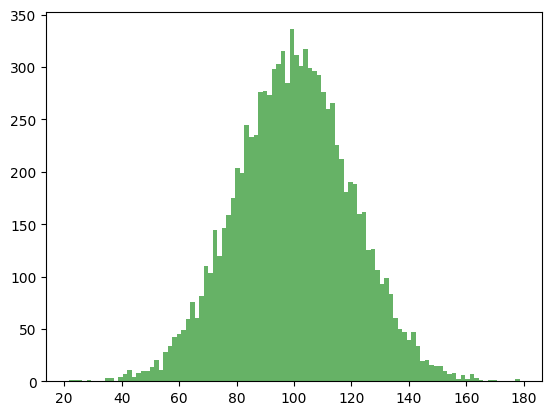

In [114]:
# ?np.random.normal
# ?np.random.seed
# set random seed
# np.random.seed(0)

plt.hist(sim, bins=100, alpha=0.6, color='g')

(array([  1.,   1.,   2.,   0.,   2.,   3.,   0.,   3.,   1.,   0.,   5.,
          7.,  11.,   0.,  16.,  24.,   0.,  26.,  25.,   0.,  39.,  50.,
         67.,   0.,  86.,  79.,   0., 131., 136.,   0., 135., 165., 205.,
          0., 232., 243.,   0., 282., 293.,   0., 309., 329., 379.,   0.,
        360., 387.,   0., 373., 405.,   0., 474., 395., 403.,   0., 382.,
        378.,   0., 356., 313.,   0., 326., 276., 258.,   0., 204., 215.,
          0., 180., 162.,   0., 148., 118.,  97.,   0., 108.,  62.,   0.,
         73.,  50.,   0.,  35.,  38.,  38.,   0.,  25.,  17.,   0.,  12.,
         11.,   0.,   6.,   9.,   3.,   0.,   4.,   6.,   0.,   4.,   1.,
          1.]),
 array([ 65. ,  65.7,  66.4,  67.1,  67.8,  68.5,  69.2,  69.9,  70.6,
         71.3,  72. ,  72.7,  73.4,  74.1,  74.8,  75.5,  76.2,  76.9,
         77.6,  78.3,  79. ,  79.7,  80.4,  81.1,  81.8,  82.5,  83.2,
         83.9,  84.6,  85.3,  86. ,  86.7,  87.4,  88.1,  88.8,  89.5,
         90.2,  90.9,  91.6,  92.3

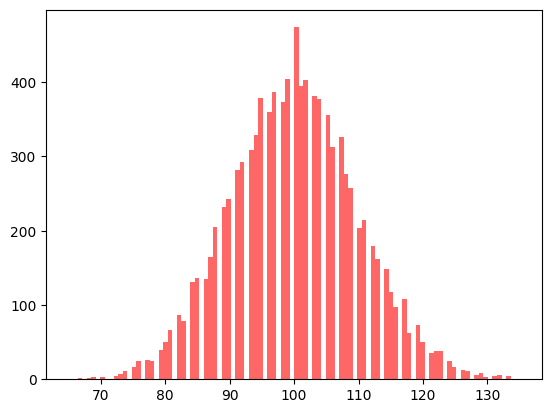

In [115]:
sim_p = np.random.poisson(100,10000)

plt.hist(sim_p, bins=100, alpha=0.6, color='r')

In [116]:
print(sim.min(),
sim.max())
print(sim_p.min(),
sim_p.max())

21.55199496763315 178.52475412872653
65 135


In [117]:
# Generate rental dates
start_date = datetime(2020, 1, 1)
rental_dates = [start_date + timedelta(days=np.random.randint(0, 365 * 3)) for _ in range(n_trip)]

print(start_date)
print(rental_dates[:10])


2020-01-01 00:00:00
[datetime.datetime(2022, 9, 15, 0, 0), datetime.datetime(2020, 6, 20, 0, 0), datetime.datetime(2021, 11, 5, 0, 0), datetime.datetime(2022, 3, 7, 0, 0), datetime.datetime(2020, 8, 31, 0, 0), datetime.datetime(2021, 2, 24, 0, 0), datetime.datetime(2021, 1, 13, 0, 0), datetime.datetime(2020, 12, 6, 0, 0), datetime.datetime(2022, 8, 11, 0, 0), datetime.datetime(2021, 11, 1, 0, 0)]


In [118]:
is_lost = np.random.rand(n_trip) < shrinkage_rate
return_dates = [
    rental_dates[i] + timedelta(days=int(sim_p[i])) if not is_lost[i] else None
    for i in range(n_trip)
]

In [119]:
# Create a DataFrame
data = pd.DataFrame({
    "rental_date": rental_dates,
    "return_date": return_dates,
    "is_lost": is_lost
})

data['n_days'] = (data['return_date'] - data['rental_date']).dt.days
data['sim_p'] = sim_p

data.head()

,rental_date,return_date,is_lost,n_days,sim_p
0,2022-09-15,2022-12-19,False,95.0,95
1,2020-06-20,2020-09-10,False,82.0,82
2,2021-11-05,2022-02-15,False,102.0,102
3,2022-03-07,2022-06-10,False,95.0,95
4,2020-08-31,2020-12-03,False,94.0,94


In [120]:
data.loc[data.is_lost == True]

,rental_date,return_date,is_lost,n_days,sim_p
13,2020-07-06,NaT,True,NaN,107
17,2022-04-16,NaT,True,NaN,108
18,2021-08-13,NaT,True,NaN,89
23,2021-06-19,NaT,True,NaN,82
26,2021-10-20,NaT,True,NaN,115
...,...,...,...,...,...
9976,2020-02-04,NaT,True,NaN,99
9977,2022-06-13,NaT,True,NaN,114
9980,2020-07-02,NaT,True,NaN,107
9992,2022-03-07,NaT,True,NaN,109


In [121]:
sum(data['is_lost']==False) 

9025

In [122]:
from lifelines import KaplanMeierFitter

In [123]:
# Prepare survival data
data['trip_completed'] = data['return_date'].notnull()  # 1 if returned, 0 if lost
data['trip_duration'] = (data['return_date'] - data['rental_date']).dt.days
data['trip_duration'].fillna(data['trip_duration'].max(), inplace=True)  # Handle NaN for lost RPCs

(array([  13.,  105.,  535., 1388., 2328., 2415., 1470.,  584.,  158.,
        1004.]),
 array([ 65.,  72.,  79.,  86.,  93., 100., 107., 114., 121., 128., 135.]),
 <BarContainer object of 10 artists>)

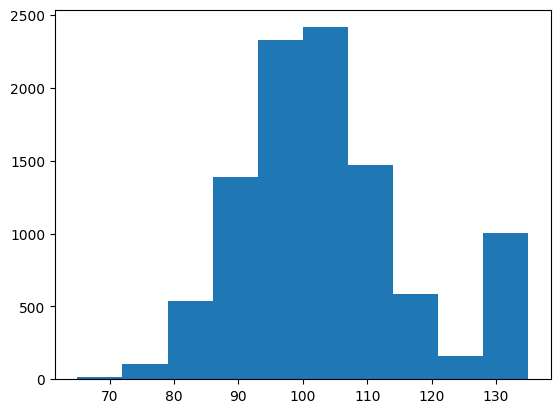

In [124]:
plt.hist(data['trip_duration'])

In [125]:
# Fit Kaplan-Meier estimator
kmf = KaplanMeierFitter()
kmf.fit(data['trip_duration'], event_observed=data['trip_completed'])

<lifelines.KaplanMeierFitter:"KM_estimate", fitted with 10000 total observations, 975 right-censored observations>

In [127]:
# Plot survival curve
# kmf.plot_survival_function()
kmf.survival_function_
# plt.title('Survival Function (Probability of RPC Not Being Lost)')
# plt.xlabel('Days Since Rental')
# plt.ylabel('Survival Probability')
# plt.show()

,KM_estimate
timeline,
0.0,1.0000
65.0,0.9999
66.0,0.9998
67.0,0.9996
68.0,0.9994
...,...
131.0,0.0985
132.0,0.0980
133.0,0.0977


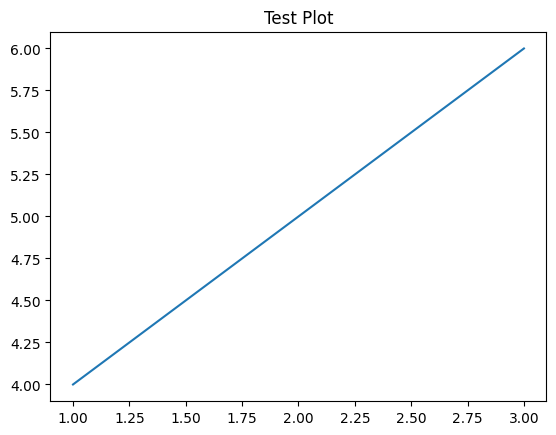

In [ ]:
# pip list
import matplotlib.pyplot as plt

# Test plot
plt.plot([1, 2, 3], [4, 5, 6])
plt.title("Test Plot")
plt.show()


In [107]:
pip list

Package                      Version
---------------------------- -----------
absl-py                      2.1.0
adagio                       0.2.6
aiohappyeyeballs             2.4.3
aiohttp                      3.10.10
aiosignal                    1.3.1
altair                       5.1.1
anyio                        4.0.0
appdirs                      1.4.4
argon2-cffi                  23.1.0
argon2-cffi-bindings         21.2.0
arrow                        1.3.0
asttokens                    2.2.1
astunparse                   1.6.3
async-lru                    2.0.4
attrs                        23.1.0
autograd                     1.7.0
autograd-gamma               0.5.0
Babel                        2.13.1
backcall                     0.2.0
beautifulsoup4               4.12.2
bleach                       6.1.0
blinker                      1.6.3
bs4                          0.0.1
cachetools                   5.3.2
certifi                      2023.7.22
cffi                         1.16.0
